<center>

# R для тервера и матстата
## 4.1 Что хочет статистик?

<br>

<center>
<img src="https://st.kp.yandex.net/im/kadr/2/2/1/kinopoisk.ru-What-Women-Want-2219360.jpg" width="350"> 



Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

-------------------------------


Двигаемся дальше. В прошлый раз мы поговорили про различные виды сходимости случайных величин. Обычно вы будете вспоминать про них в ситуациях, когда приходится говорить про различные статистические оценки и их свойства. Именно о них пойдёт речь в этой тетрадке. 

Каждый статистик хочет трёх вещей: несмещённости, состоятельности и эффективности. Однако одно дело хотеть этого,совершенно другое - понимать зачем ты этого хочешь. В первой части тетрадки мы попробуем понять зачем этого всего нужно хотеть и посмотреть на то как выглядят эти присловутые несмещённость, состоятельность и эффективность. 

In [119]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# 1. Любой статистик хочет 

* Несмещённость 
* Состоятельность 
* Эффективность

## 1.1 Про несмещённость 

Первым свойством, которое мы обсудем, станет несмещённость. Начнём с определения. 

__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __несмещённой,__ если $E(\hat \theta) = \theta$.

Хорошо. А теперь попробуйте объяснить это бабушке простым языком. Слабо? 

Давайте попробуем разобраться вместе. Для этого нам предстоит отправиться в долину реки Лимпопо. В ней обитает племя аборигенов, которое охотится на мамонтов. Предположим, что процесс порождения данных создавал мамонтов в долине реки Лимпопо следующим образом: он сгерерировал 10 тысяч мамонтов со средним весом 300 кг и стандартным отклонением 100 кг. 

In [1]:
x_mamont = rnorm(10^4, mean=300, sd=100) # вся генеральная совокупность 
x_mamont[1:5]

[1] 282.7815 435.7341 398.6510 352.3327 320.1006

Каждый день племя стабильно убивает одного мамонта. От среднего веса убитого мамонта зависит то насколько сильно племя будет голодать. Конечно же, аборигенам хотелось бы знать о добыче заранее. Для этого в племени держат трёх шаманов. Все три шамана живут на вершине одинокой горы, с которой стабильно видна сотня мамонтнов, случайно забредшая в долину реки Лимпопо. Все три шамана обладают ясным взором и могут определить вес мамонта с одного взгляда.

Шаман Одэхингум ([паблик вконтакте](https://vk.com/topic-29582719_26068566) говорит, что это переводится как лёгкое колебание воды) уверен в своём взоре и без толики сомнения каждый раз сообщает вождю, что вес мамонта, которого поймает племя будет 

$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$


Шаман Пэпина (что означает это имя, можно посмотреть в том же паблике) также обладает хорошим взором. Вместе с этим он обладает комплексом неполноценности. Он боится сделать слишком оптимистичный прогноз. Поэтому он считает среднее по сотне мамонтов и немного занижает его на волшебную константу

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

Шаман Апониви среди трёх шаманов больше всего не уверен в себе. Он сильнее всех коректирует свой прогноз

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

Итак, у нас есть три шамана-оценивателя. Давайте разбираться какими свойствами эти шаманы обладают. Посмотрим на истиный средний вес мамонтов по генеральной совокупности. 

In [120]:
mean(x_mamont)

[1] 299.3558

Попробуем извлечь подвыборку из сотни мамонтов и посмотреть что будет происходить с ней. Ясное дело, раз на раз не приходится. Иногда вес мамонта оказыватся гораздо больше среднего. Иногда меньше.

In [123]:
x_sample = sample(x_mamont, size = 100) 

mean(x_sample) # Раз на раз не приходится :3

[1] 297.0304

Ну что-ж! Давайте оценивать веса мамонтов. Предположим, что шаманы работают на протяжении 200 дней. Давайте посмотрим насколько хорошо они в течение этого периода будут помогать вождю. 

In [124]:
th_od = rep(0,200)
th_pe = rep(0,200)
th_ap = rep(0,200)

for(i in 1:200){
    x_sample = sample(x_mamont, size = 100) 
    th_od[i] = mean(x_sample)
    th_pe[i] = mean(x_sample) - 4200/100
    th_ap[i] = mean(x_sample) - 5*(100+1)/100    
}

Одэхингум, пользуясь своей формулой в среднем будет угадывать математическое ожидание веса мамонта. Вождь ему за это может сказать только спасибо. Оценка оказывается несмещённой. 

In [125]:
mean(th_od)

[1] 298.9544

Пэпина, используя свой подход будет очень сильно занижать вес. То есть, используя свою формулу для прогнозирования добычи охотников, шаман будет систематически ошибаться. Его оценка оказывается смещённой.

In [126]:
mean(th_pe)

[1] 256.9544

Оценка Апониви также окажется смещёной, но гораздо меньше. 

In [127]:
mean(th_ap)

[1] 293.9044

![](https://upload.wikimedia.org/wikipedia/commons/3/32/Densityvsbox.png)

In [135]:
df = data.frame('theta' = c(th_od, th_pe, th_ap),
                'who' = c(rep('Odahingum',200), rep('Pappina',200), rep('Opanovi',200)))
head(df,5)

theta,who
304.7187,Odahingum
298.1863,Odahingum
309.0638,Odahingum
312.8581,Odahingum
312.7131,Odahingum


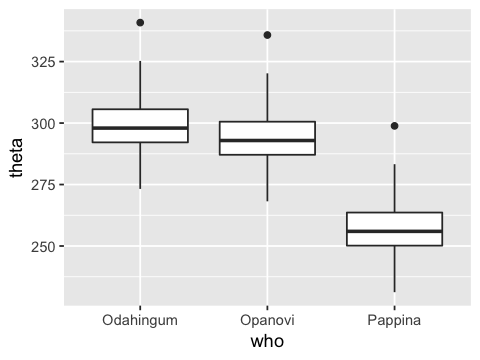

In [140]:
ggplot(df, aes(who, theta)) + geom_boxplot()

Можно попробовать построить виолончель. Это то же самое, что и ящик с усами, но покрасивше. 

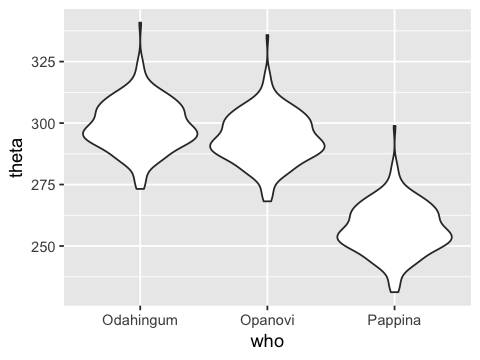

In [141]:
ggplot(df, aes(who, theta)) + geom_violin()

Что мы видим? Последний ящик с усами мдвинут довольно сильно вниз по отношению к остальным. Это и есть то самое смещение в оценивателе. Второй ящик сдвинулся вниз совсем малость. Если попробовать генерировать разное число наблюдений, можно увидеть как второй ящик постепенно двигается вверх. Третий при этом остаётся на месте. 

Хех. Шаманы. Детский сад, скажите вы. Подавай нам что-нибудь из бизнеса. Окей, договорились. Давайте предположим, что шаманы прогнозируют не вес мамонта, а то на какую сумму в среднем будут наступать страховые случаи. Ясное дело, что наш  бюджет на статистические исследования довольно сильно ограничен. И ежедневно мы можем собирать информацию только от ограниченного числа респондентов. Если мы стабильно будем на основе этой информации получать смещённую оценку страхового покрытия, то вместо получения прибыли в среднем, мы легко можем оказаться банкротами. 

__Ещё раз, ещё раз:__ несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 

## 1.2 Про состоятельность 

## 1.3 Про оба свойства сразу

Если оценка оказалась состоятельной, это не означает что она несмещённая. Эти два свойства независимы друг от друга и возможны самые разные их комбинации. Давайте попробуем взять случайную величину $X \sim N(\mu,1)$ и попробуем придумать такие оценки для параметра $\mu$, которые будут обладать разными комбинациями из свойств. 


|  $\hat \mu$   |несмещённая          | смещённая             |
|---------------|---------------------|-----------------------|
|состоятельная  |                     |                       |
|несостоятельная|                     |                       |

* Несмещённая и состоятельная - среднее! По ЗБЧ сходится к $\mu$ по вероятности. И с математическим ожиданием всё окей. Вы на лекциях тыщу раз считали. 
* Состоятельная и смещённая - скоректированное среднее. Это как раз оценка второго шамана. При больших $n$ поправка умирает, это обеспечивает состоятельность. При фиксированных $n$ она есть и это вносит систематическую ошибку. 
* Несостоятельная, несмещенная - любое наблюдение. Давайте какого бы объёма не оказалась наша выборка, всегда будем оценивать $\mu$ только по первому наблюдению. Такая оценка окажется несмещённой. При этом она будет несостоятельной, так как мы при увеличении выборки никак не можем на неё повлиять. 
* Смещённая и несостоятельная - любая ересь, которая пришла вам в глову. Например $arctg(\bar x)$. 


|  $\hat \mu$   |несмещённая          | смещённая             |
|---------------|---------------------|-----------------------|
|состоятельная  |        $\bar x$     |   $\bar x + ^1/_n$    |
|несостоятельная|        $x_1$        |   $arctg(\bar x)$     |


Попробуем сделать то же самое с распределением $X \sim U[0; a]$.

|  $\hat a  $   |несмещённая          | смещённая             |
|---------------|---------------------|-----------------------|
|состоятельная  |    $2 \bar x$       |    $x_{max}    $      |
|несостоятельная|     $2 x_1$         |    $x_1^{x_2} -8$     |


## 1.4 С

In [78]:
x_general = rnorm(10^4, mean=10, sd=3) # вся генеральная совокупность 
x_general[1:5]

[1] 10.391716  9.070869 14.073732  6.877377  6.842109

In [79]:
n_obs = 100
estimation_1 = rep(0,n_obs)
estimation_2 = rep(0,n_obs)

n_sample = 10
lambda = 15

for(i in 1:n_obs){
    x_sample = sample(x_general, size = n_sample) 
    estimation_1[i] = sum(x_sample)/n_sample
    estimation_2[i] = sum(x_sample)/(n_sample + lambda)
}

df = data.frame(estimation =c(estimation_1, estimation_2),
                estimator = c(rep('estimator_1',100),rep('estimator_2',100)))

head(df,5)

estimation,estimator
11.302500,estimator_1
10.783764,estimator_1
10.551149,estimator_1
9.720656,estimator_1
9.320209,estimator_1


In [80]:
var(estimation_1)
var(estimation_2)

[1] 0.97074

[1] 0.1553184

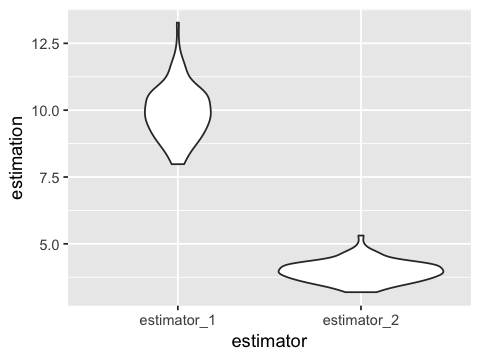

In [81]:
ggplot(df, aes(estimator, estimation)) + geom_violin()

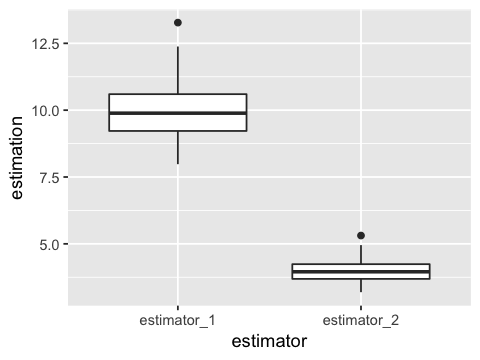

In [82]:
ggplot(df, aes(estimator, estimation)) + geom_boxplot()